In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 2**10
# заранее считаем значения коэффициентов
c_array_fft = []
c_array_rfft = []
for i in range(1, N + 1):
    c_array_fft.append(np.exp((2*np.pi/i)*1j))
    c_array_rfft.append(1/(np.exp((2*np.pi/i)*1j)))
c_array_fft = np.array(c_array_fft, dtype=np.complex128)
c_array_rfft = np.array(c_array_rfft, dtype=np.complex128)

In [3]:
def FFT(array):
    # выбираем из массива коэффициент для текущего размера массива
    c_main = c_array_fft[len(array) - 1]
    # если уже дошли до матрицы 2x2
    if len(array) == 2:
        return [array[0] + array[1], array[0] - array[1]]

    # делим на два подмассива - с четными и нечетными индексами и находим их преобразование фурье
    odd_array = FFT(array[1::2])
    even_array =  FFT(array[::2])

    # считаем коэффициенты в диагональной матрице
    c_array_temp = []
    for i in range(1, len(odd_array) + 1):
        c_array_temp.append(c_main**(i - 1))
    c_array_temp = np.array(c_array_temp, dtype=np.complex128)

    # объединяем подмассивы в один
    return np.hstack((even_array  + c_array_temp*odd_array, even_array  - c_array_temp*odd_array))

def RFFT(array):
    # выбираем из массива коэффициент для текущего размера массива
    c_main = c_array_rfft[len(array) - 1]
    # если уже дошли до матрицы 2x2
    if len(array) == 2:
        return [array[0] + array[1], array[0] - array[1]]

    # делим на два подмассива - с четными и нечетными индексами и находим их преобразование фурье
    odd_array = RFFT(array[1::2])
    even_array =  RFFT(array[::2])

    # считаем коэффициенты в диагональной матрице
    c_array_temp = []
    for i in range(1, len(odd_array) + 1):
        c_array_temp.append(c_main**(i - 1))
    c_array_temp = np.array(c_array_temp, dtype=np.complex128)

    # объединяем подмассивы в один
    result = np.hstack((even_array  + c_array_temp*odd_array, even_array  - c_array_temp*odd_array))
    if len(result) == N:
        return result/N
    return result

In [4]:
def frequency(t, n):
    w_g = 1/t
    dw = w_g/n
    def w_j(j):
        if (0 <= j <= n/2):
            return j*dw
        else:
            return j*dw - w_g
    w = []
    for i in range(n):
        w.append(w_j(i))
    return np.array(w)

Двухшаговый метод

In [20]:
def schrodinger_two_steps(y_0, t, x, a):
    #k = np.fft.fftfreq(len(x), d = x[1] - x[0])
    k = frequency(t = x[1] - x[0], n = len(x))*2*np.pi
    a_k = -a*k**2

    # y_x_t - начальное положение в t
    y_x_t = []
    y_x_t.append(y_0)
    
    for i in range(1, len(t)):
        dt = t[i] - t[i - 1]
        y_1_step = RFFT(np.exp(-a_k*dt/2)*FFT(y_x_t[i - 1]))
        y_2_step = np.exp(-1j*(abs(y_1_step)**2)*dt/2)*y_1_step
        y_x_t.append(y_2_step)
    
    return abs(np.array(y_x_t))

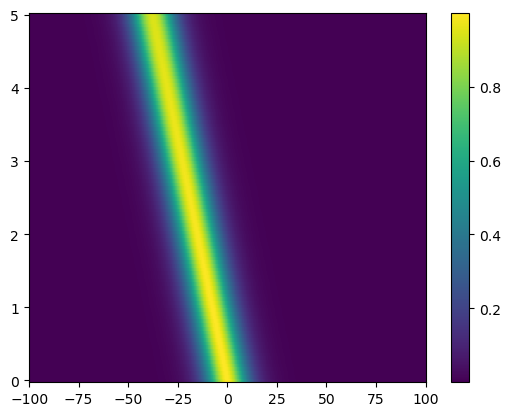

In [34]:
y_0 = lambda g, x : 1/np.cosh(g*x)*np.exp(1j*17*x)
x = np.linspace(-100, 100, N)
t = np.linspace(0, 5, 100)

Y = np.array(schrodinger_two_steps(np.array(y_0(0.1, x)), t, x, -1j/2))
X, T = np.meshgrid(x, t)
pict = plt.pcolormesh(X, T, Y*Y, shading = 'auto')
plt.colorbar(pict)

Трехшаговый метод

In [32]:
def schrodinger_three_steps(y_0, t, x, a):
    #k = np.fft.fftfreq(len(x), d = x[1] - x[0])
    k = frequency(t = x[1] - x[0], n = len(x))
    a_k = -a*k**2

    # y_x_t - начальное положение в t
    y_x_t = []
    y_x_t.append(y_0)
    
    for i in range(1, len(t)):
        dt = t[i] - t[i - 1]
        y_1_step = RFFT(np.exp(a_k*dt/4)*FFT(y_x_t[i - 1]))
        y_2_step = np.exp(-1j*(abs(y_1_step)**2)*dt/2)*y_1_step
        y_3_step = RFFT(np.exp(a_k*dt/4)*FFT(y_2_step))
        y_x_t.append(y_3_step)
    
    return abs(np.array(y_x_t))

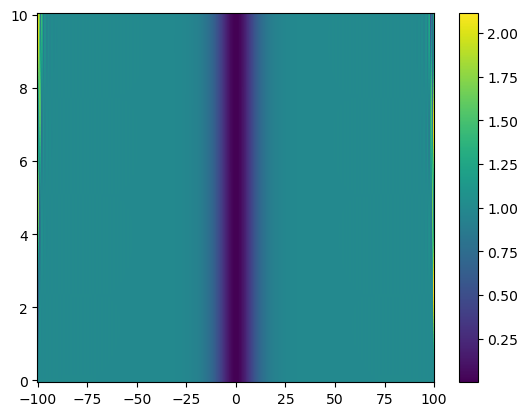

In [33]:
y_0 = lambda g, x : np.tanh(g*x)
x = np.linspace(-100, 100, N)
t = np.linspace(0, 10, 100)

Y = np.array(schrodinger_three_steps(np.array(y_0(0.1, x)), t, x, -1j/2))
X, T = np.meshgrid(x, t)
pict = plt.pcolormesh(X, T, Y*Y, shading = 'auto')
plt.colorbar(pict)